# Explore here

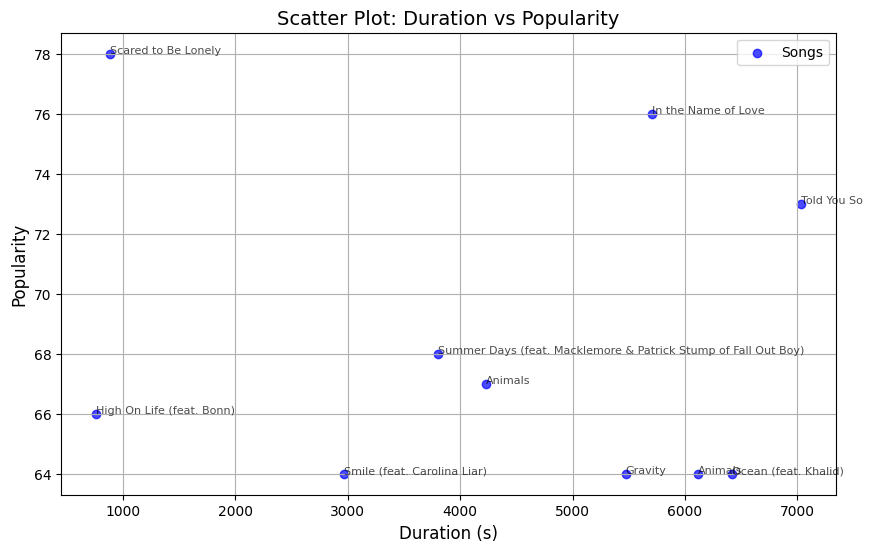

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv('/workspaces/interacting-with-api-python-project-tutorial/src/.env')
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

#store the credential manager, the uri we will be using and the API
client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
garrix_uri = '60d24wfXkVzDSfLS6hyCjZ'
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#store the tracks
result = spotify.artist_top_tracks(garrix_uri)
tracks = result['tracks']

#create the lists we will be using for the dataframe. We will turn the duration from ms to s
names = [item['album']['name'] for item in tracks]
popularities = [item['popularity'] for item in tracks]
ms_durations = [item['duration_ms']for item in tracks]
seconds_durations = [(duration % 10000) for duration in ms_durations]

#create the dataframe
df = pd.DataFrame({
    'Name': names,
    'Popularity': popularities,
    'Duration': seconds_durations
})

#sort it by popularity
sorted_df = df.sort_values(by='Popularity', ascending=False)

#plot it
plt.figure(figsize=(10, 6)) 
plt.scatter(df['Duration'], df['Popularity'], color='blue', alpha=0.7, label='Songs')

plt.xlabel('Duration (s)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.title('Scatter Plot: Duration vs Popularity', fontsize=14)
plt.legend()

for i, name in enumerate(df['Name']):
    plt.text(df['Duration'][i], df['Popularity'][i], name, fontsize=8, alpha=0.7)

plt.grid(True)
plt.show()


Judging by the scatter plot, there doesn't seem to be any correlation between the duration of a song and its popularity, as the data is dispersed in an unpatterned way within the graph.